# 4TIN811U Machine Learning & Deep Learning
# TP 12 (noté) - Effet de la *régularisation* sur le biais et la variance

# Commentaires sur la correction
- Ceux qui ont utilisé `np.vander()` à la première question, sans aucun commentaire et sans le paramètre `increasing=True`, n'ont pas les degrés dans l'ordre demandé ; ça marche mais ça ne correspond pas à la consigne et ça montre une incompréhension de ce qui est fait (cela a été pénalisé faiblement). Aussi, cela implique que $\theta_0$ est le dernier paramètre, ce qui rend le bonus plus compliqué à comprendre.
- Pour le graphique de la norme, certains ont déduit erronément que la norme de $\theta$ était $0$ jusqu'aux degrés élevés, car le graphique avait l'air plat au début. Toutefois, cela était dû à la croissance exponentielle de la norme, qui donnait l'illusion que les premières valeurs étaient nulles (car elles sont faibles comparativement aux dernières). Notez qu'un $\theta$ nul n'aurait pas pu donner des polynômes intéressants au graphique précédent. Même sans utiliser une échelle logarithmique dans le graphique, vous pouviez juste `print` les valeurs de $||\theta||$ pour constater que les valeurs n'étaient pas nulles.
- Pour calculer le biais et la variance, presque personne n'a utilisé le code du cours 7 (duquel il fallait modifier 3 lignes, et dont le lien était rappelé au début du TP). J'y vois peu d'autres explications qu'un manque d'étude du contenu du cours. Beaucoup ont tenté des choses avec ChatGPT, qui se trompe régulièrement dans le sens sur lequel faire les moyennes (souvent, les moyennes sont faites sur les prédictions d'un même jeu de données, ce qui n'a pas de sens), mais tombait parfois sur les bonnes formules.
- Pour le bonus, la question demandait d'afficher $\theta_0$ après entraînement, ce qui était facilement faisable dès la première question mais que personne n'a fait (vous auriez vu que le premier élément du vecteur était toujours $0$, et cela rapportait déjà des points). ChatGPT n'a pas semblé comprendre la question (probablement car elle se trouvait loin du contexte, qui venait de la première question du TP).
- Certains ont pu s'aider de modèles de langage (avec citation) et ont tout de même montré une compréhension et du recul par rapport à ce qui était généré. Toutefois, les phénomènes suivants, corrélés à l'utilisation de modèles de langage, ont été pénalisés :
    - La présence d'informations superflues, non liées à la question. ChatGPT est plutôt loquace et en dit souvent trop, mais si vous copiez-collez ce qui est généré, il est nécessaire d'au moins montrer que vous comprenez quelles informations sont pertinentes pour répondre à la question. Certains ont écrit trois longs paragraphes pour une question sur 1 point, qui attendait une réponse d'une ou deux phrases.
    - Certaines réponses, certes correctes, ignorent complètement ce qui a été fait précédemment dans le TP et recodent localement (de façon différente !) des fonctions réalisées aux questions précédentes. Cela montre un manque de compréhension des énoncés. De plus, ne pas factoriser son code est en général une mauvaise pratique.
    - Il reste des traces évidentes de copiés-collés trop hâtifs : par exemple, les formules mathématiques (générées par des modèles de langage) n'ont souvent plus aucun sens après copié-collé. Cela n'a pas été pénalisé en cas de mention régulière d'une source dans le rendu, mais est sanctionné en l'absence de source (notez que "source : Internet" n'est pas une source suffisamment précise). Dans des travaux où vous disposez de plus de temps, si vous souhaitez copier-coller une réponse d'un modèle de langage, il est pertinent d'expliquer quel prompt vous avez utilisé, ou la méthodologie utilisée pour obtenir une telle réponse.
    - Certaines questions demandaient explicitement de commenter le code, mais cela n'est souvent pas fait. Cela n'est pas un gros problème quand le code est clair et utilise des techniques basiques (ce qui est généralement le cas du code écrit par des humains), mais est plus sévèrement sanctionné en cas de code très concis utilisant des méthodes de numpy jamais utilisées en cours et dans les TPs : si vous utilisez des choses complexes, il faut montrer que vous les comprenez.

# Énoncé
***IMPORTANT :*** **Vous pouvez également partir de code déjà existant et le modifier, auquel cas il faut impérativement mentionner la source du code d'origine (même pour du code issu du cours ou des corrections des TPs).** Dans ce TP, vous **pouvez** utiliser `scikit-learn` quand cela est précisé. Le nombre de points de chaque question est noté avant la question.

Vous pouvez bien sûr définir vos propres fonctions, rajouter des cases dans le notebook, ou rajouter des commentaires si vous le jugez utile. Si vous tombez à court de temps mais que tout ne fonctionne pas encore, n'hésitez pas à décrire où vous en êtes et ce qui, selon vous, pourrait être corrigé avec plus de temps.

Nous reprenons le code du cours 7 (**[qui se trouve sur Moodle](https://moodle.u-bordeaux.fr/mod/resource/view.php?id=414484&forceview=1)**). Nous allons approximer une courbe sinusoïdale avec des polynômes de degré plus ou moins élevé.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Settings
n_train = 100  # Size of the training dataset
n_test = 500 # Size of the test dataset
noise = .1  # Standard deviation of the noise
np.random.seed(42)

# Fonction à prédire
def f(x):
    return np.sin(10*x)

xlim = [.1,.9]
ylim = [-1.2,1.2]

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * xlim[1]
    X = np.sort(X)
    Y = np.random.normal(f(X), noise, n_samples)
    return X, Y

X_ideal, Y_ideal = generate(n_samples=200, noise=0.0)
X_train, Y_train = generate(n_samples=n_train, noise=noise)
X_test, Y_test = generate(n_samples=n_test, noise=noise)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((100,), (100,), (500,), (500,))

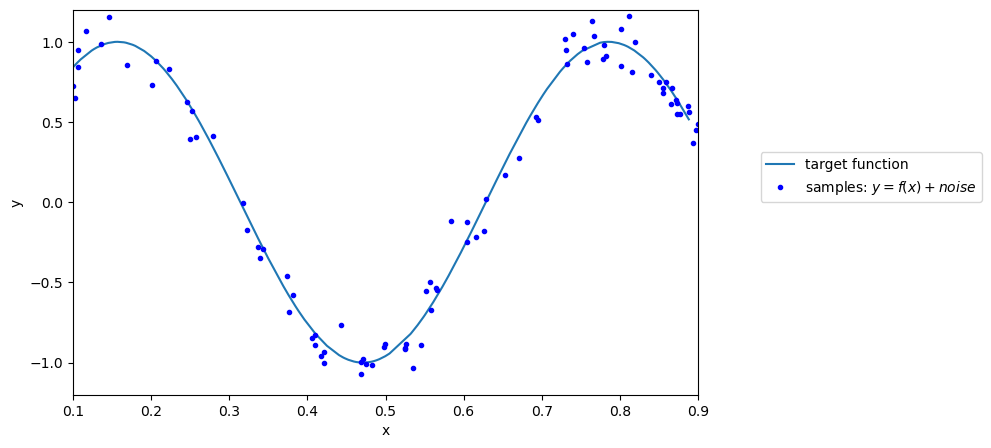

In [2]:
plt.figure(figsize=(10, 5))

# Plot f
plt.plot(X_ideal, Y_ideal, label="target function")

# Plot training data
plt.plot(X_train, Y_train, ".b", label="samples: $y = f(x)+noise$")

plt.xlim(xlim)
plt.ylim(ylim)
plt.legend(loc=(1.1, 0.5))
plt.xlabel("x")
plt.ylabel("y")

plt.subplots_adjust(right=0.75)
plt.show()

**(/3)** Pour le moment, chaque $x$ dans `X_train` contient une valeur réelle.

- À l'aide d'une **régression linéaire**, implémentez une fonction qui prend en paramètre un degré $k\in\mathbb{N}$ et retourne le polynôme de degré $k$
$$
h_\theta(x) = \theta_0 + \theta_1x + \dots + \theta_kx^k
$$
qui minimise la fonction de coût "moindres carrés". *Utilisez `scikit-learn` pour appliquer la régression linéaire.*
- **Expliquez dans votre code (avec un commentaire) comment vous augmentez le nombre de features de vos exemples (si vous utilisez une fonction de `numpy`, expliquez ce qu'elle représente).**
- Vérifiez la taille de votre ensemble d'entraînement après avoir augmenté ses features en utilisant un `assert(condition)`.



In [3]:
from sklearn.linear_model import LinearRegression

def augment_features(X, degree):
    """
    Prend un paramètre un vecteur `X` contenant m exemples avec chacun une feature x, et retourne une matrice
    avec m lignes telle que chaque ligne contient les features (1, x, x^2, ..., x^degree).
    """
    # On prend toutes les puissances du vecteur X, qu'on considère comme un vecteur colonne, et on concatène ces colonnes horizontalement.
    res = np.concatenate([np.power(X, k)[:,None] for k in range(degree + 1)], axis=1)
    assert(res.shape == (X.shape[0], degree + 1)) # Il y a m exemples, chacun avec degree + 1 features (où degree = k).
    return res

# Code similaire à celui du cours 7.
def fit_polynomial(X, Y, degree):
    """
    Retourne le modèle scikit-learn qui calcule le polynôme de degré `degree`
    qui minimise les moindres carrés sur les données `X` avec target `Y`.
    """
    model = LinearRegression(fit_intercept=False) # Bonus : fit_intercept = False, sinon theta_0 = 0 car sklearn a son propre intercept term.
    model.fit(augment_features(X, degree), Y)
    return model

augmented_features = augment_features(X_train, 3) # Devrait avoir taille (n_train, 4)
print(augmented_features[:10]) # Matrice de largeur 4, telle que chaque ligne contient les puissances du nombre en position 1
print(augmented_features.shape)

[[1.00000000e+00 1.02182803e-02 1.04413252e-04 1.06692388e-06]
 [1.00000000e+00 1.09390272e-02 1.19662317e-04 1.30898934e-06]
 [1.00000000e+00 2.37302770e-02 5.63126049e-04 1.33631371e-05]
 [1.00000000e+00 3.88439208e-02 1.50885018e-03 5.86096568e-05]
 [1.00000000e+00 4.06968031e-02 1.65622978e-03 6.74032573e-05]
 [1.00000000e+00 4.09017423e-02 1.67295252e-03 6.84266730e-05]
 [1.00000000e+00 5.06729481e-02 2.56774767e-03 1.30115344e-04]
 [1.00000000e+00 5.07379470e-02 2.57433926e-03 1.30616689e-04]
 [1.00000000e+00 6.64169083e-02 4.41120570e-03 2.92978645e-04]
 [1.00000000e+00 6.99611733e-02 4.89456577e-03 3.42429564e-04]]
(100, 4)


On affiche les prédictions de votre modèle pour quelques valeurs de $k$.

[ 1.09696315 -6.70385784  7.46972262]
[  -0.21088825   21.7145242  -116.03744212  162.04875276  -16.55747862
  -54.93436444]
[ 1.31742282e+00 -1.81146270e+02  1.06143657e+04 -2.94395635e+05
  4.62653437e+06 -4.43022953e+07  2.63671598e+08 -9.08113075e+08
  9.42297111e+08  7.19961065e+09 -4.36294446e+10  1.28327930e+11
 -2.35135631e+11  2.64554319e+11 -1.27310501e+11 -1.16044634e+11
  2.78621344e+11 -2.57385227e+11  1.35011184e+11 -3.95118529e+10
  5.04500682e+09]
[ 2.02343923e+00 -3.17334746e+02  2.02460874e+04 -6.51296405e+05
  1.27249230e+07 -1.67439865e+08  1.58980054e+09 -1.13498014e+10
  6.18731587e+10 -2.55841136e+11  7.81577320e+11 -1.67379906e+12
  2.23278365e+12 -1.15965953e+12 -1.20188762e+12  1.60415137e+12
  9.37053346e+11 -1.40655666e+12 -1.34562109e+12  6.61273730e+11
  1.70701956e+12  6.84797911e+11 -1.01996991e+12 -1.64084240e+12
 -7.68872459e+11  7.08612864e+11  1.56797145e+12  1.28379335e+12
  1.68479743e+11 -1.00179643e+12 -1.54205658e+12 -1.23729391e+12
 -3.23233927

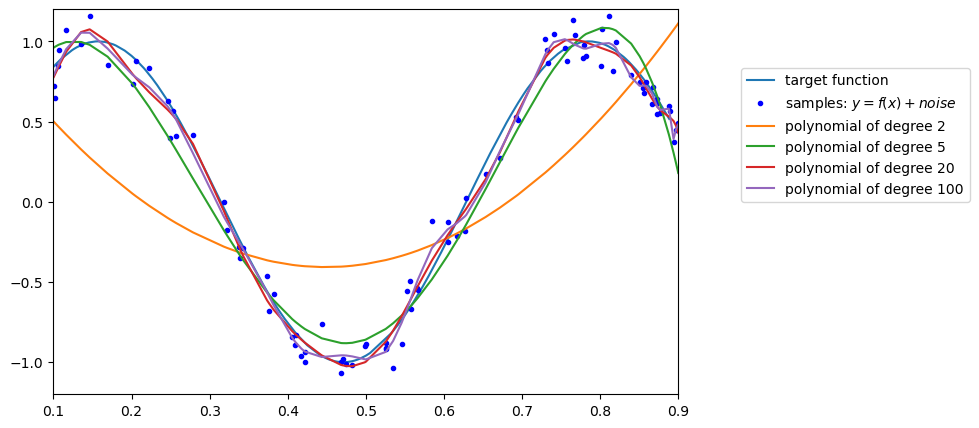

In [4]:
# Code du cours 7

plt.figure(figsize=(10, 5))

# Plot f
plt.plot(X_ideal, Y_ideal, label="target function")

# Plot training data (the first one)
plt.plot(X_train, Y_train, ".b", label="samples: $y = f(x)+noise$")

def apply_polynomial(model, X):
    '''
    Evaluates a linear regression model on an input sample
    model: linear regression model
    X: input sample
    '''
    degree = model.coef_.size - 1
    Y = model.predict(augment_features(X, degree))
    return Y

def fit_plot(degree):
    model = fit_polynomial(X_train, Y_train, degree)
    print(model.coef_)
    Y_predicted = apply_polynomial(model, X_train)
    plt.plot(X_train, Y_predicted, label="polynomial of degree " + str(degree))

fit_plot(2)
fit_plot(5)
fit_plot(20)
fit_plot(100)

plt.xlim(xlim)
plt.ylim(ylim)
plt.legend(loc=(1.1, 0.5))

plt.subplots_adjust(right=0.75)
plt.show()

**(/2)** Expliquez avec vos mots le dilemme entre *biais* et *variance*, et comment il est illustré par des prédictions utilisant des polynômes de degré varié.

*Réponse :* L'erreur entre un modèle de prédiction et une fonction à prédire peut généralement être réduite à trois composantes :
- Une composante appelée *erreur irréductible*, qui est due à du bruit (idéalement petit) dans les données. Cette composante est inévitable ; on ne peut a priori pas prédire le bruit sans avoir accès à davantage de features. Ici, l'erreur irréductible est représentée par la variable `noise`.
- Une composante appelée *biais*, qui est la différence entre les prédictions et la fonction à prédire due à l'incapacité du modèle à représenter la fonction, généralement en raison d'une complexité trop faible du modèle. Un biais élevé est lié au phénomène de sous-apprentissage: le modèle n'est pas assez général pour prédire la fonction.
- Une composante appelée *variance*, qui décrit la sensibilité du modèle appris à des petites variations de l'ensemble d'entraînement. Si un modèle prédit bien les données d'entraînement mais est très sensible, cela veut dire qu'il s'adapte trop à l'ensemble d'entraînement, ce qui entraîne du surapprentissage.

Il y a généralement un compromis à trouver entre biais et variance, qui se traduit en un compromis sur la complexité du modèle à sélectionner (il faut un modèle complexe, mais pas trop).

Pour les régressions polynomiales, augmenter le degré du polynôme donne des modèles plus généraux et plus complexes. Le biais diminue donc au fur et à mesure qu'on augmente le degré du polynôme. Par contre, au plus le degré du polynôme est élevé, au plus le modèle pourra s'adapter précisément aux données d'entraînement, donc la variance augmente. On peut voir sur le graphique ci-dessus qu'un polynôme de degré $2$ ne parvient pas à s'approcher de la fonction et a un biais élevé, alors qu'un polynôme de degré $100$ modèle trop bien les petites variations des données d'entraînement dues au bruit et semble avoir une variance élevée.

Dans la suite du TP, on va s'intéresser à la norme du vecteur $\theta$, pour essayer d'établir un lien avec la question de biais et variance.

**(/3)** Affichez un graphique qui donne la **norme euclidienne $||\theta||$ de $\theta$** en fonction du degré du polynôme (par exemple, pour tous les degrés de $1$ à $30$). Utilisez une échelle adaptée sur l'axe vertical pour que les valeurs soient plus lisibles et comparables.

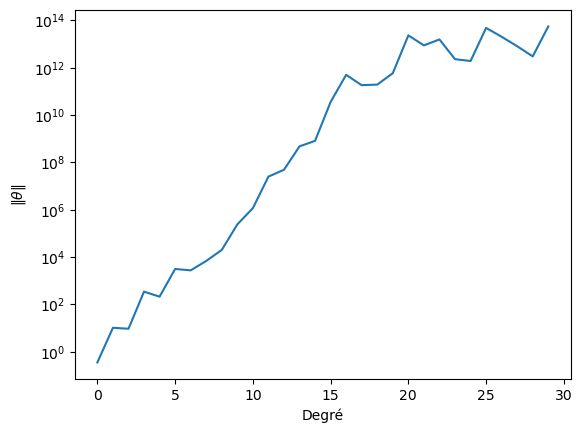

In [5]:
norm = []

for degree in range(1, 31):
    model = fit_polynomial(X_train, Y_train, degree)
    # print(model.coef_) # Pour observer les valeurs de theta_0 pour le bonus
    norm.append(np.linalg.norm(model.coef_))

plt.yscale("log") # Échelle logarithmique
plt.xlabel("Degré")
plt.ylabel("$\|\\theta\|$")
plt.plot(norm)

Que constatez-vous sur la magnitude du vecteur $\theta$ ?

*Réponse :* Les valeurs de norme de $\theta$ augmentent en fonction du degré de deviennent rapidement très grandes ($> 10^{10}$ pour des grands degrés) comparées aux données qui sont toutes entre $0$ et $1$. Pour mieux visualiser cet effet, on peut utiliser une échelle logarithmique pour les valeurs de $y$.

Pour limiter l'effet de ce que vous avez observé à la question précédente, on peut modifier la fonction de coût "moindres carrés" de la façon suivante. Pour un hyperparamètre $\alpha \ge 0$ fixé, on définit une fonction de coût
$$
    J(\theta) = \frac{1}{2}\left(\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2\right) + \alpha ||\theta||^2.
$$

**(/1)** Expliquez la différence dans cette formule par rapport à la régression linéaire classique, et l'effet que cela a sur les vecteurs $\theta$ appris.

*Réponse :* La différence est le terme supplémentaire $\alpha||\theta||^2$. On note que quand $\alpha = 0$, on retrouve exactement la fonction de coût classique pour la régression linéaire. Quand $\alpha$ est non-nul, le terme supplémentaire induit une "pénalité" ; au plus la norme de $\theta$ est grande, au plus le coût est élevé. La fonction de coût essaie donc toujours de minimiser les moindres carrés, mais en limitant la norme du vecteur $\theta$.

**(/2)** Cette régression linéaire modifiée correspond à la *ridge regression*, qui est une [fonction disponible dans `scikit-learn`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html). En utilisant `scikit-learn`, montrez l'effet que vous avez discuté à la réponse ci-dessus sur un graphique adapté.

In [6]:
from sklearn.linear_model import Ridge

def fit_polynomial_regularized(X, Y, degree, alpha):
    """
    Retourne le modèle scikit-learn qui calcule le polynôme de degré `degree`
    qui minimise la fonction de coût J sur les données `X` avec target `Y`.
    """
    model = Ridge(fit_intercept=False, alpha=alpha) # Bonus : fit_intercept = False, sinon theta_0 = 0 car sklearn a son propre intercept term.
    model.fit(augment_features(X, degree), Y)
    return model

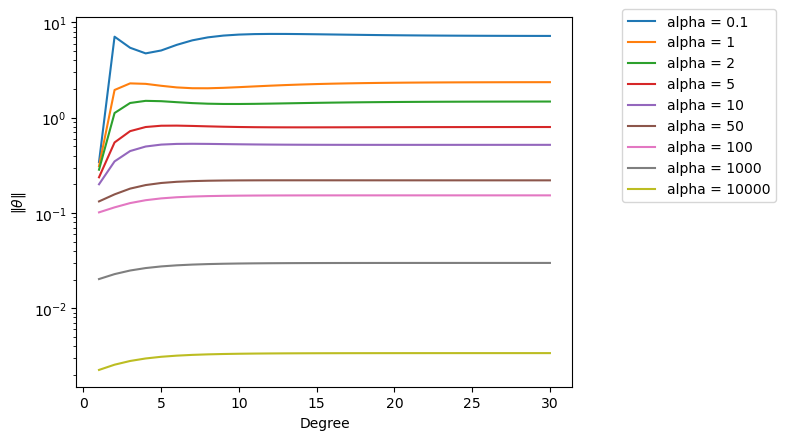

In [7]:
alphas_to_test = [0.1, 1, 2, 5, 10, 50, 100, 1000, 10000] # Vous pouvez tester les alphas dans ce tableau

def get_norm_ridge(X, Y, degree, alpha):
    model = fit_polynomial_regularized(X, Y, degree, alpha)
    assert(np.size(model.coef_) == degree + 1)
    return np.linalg.norm(model.coef_)

for alpha in alphas_to_test:
    norms = [get_norm_ridge(X_train, Y_train, i, alpha) for i in range(1,31)]
    plt.plot(range(1,31), norms, label=f"alpha = {alpha}")

plt.legend(loc=(1.1, 0.5))
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('$\|\\theta\|$')
plt.show()

On peut voir qu'au plus $\alpha$ est grand, au moins la norme du $\theta$ prédit est grande.

**(/3)** Rappelez (en français) comment vous pouvez approximer le biais et la variance en générant plusieurs datasets avec du bruit.

*Réponse :* Cela est discuté à la fin du cours 7 sur Moodle.

Implémentez une fonction qui retourne le biais et la variance (expérimentale) d'un modèle de *ridge regression* pour un degré et un $\alpha \ge 0$ en argument, et calculez quelques exemples de valeurs. Vous pouvez utiliser la fonction `generate(n_samples, noise)` définie plus haut pour générer plusieurs datasets avec du bruit. **Veillez à commenter votre code.**

In [8]:
n_train = 100
n_repeat = 100 # Nombre d'expériences considérées pour faire des statistiques

# Code inspiré de celui du cours 7.
def bias_variance(degree, alpha):
    """ Retourne le biais et la variance empiriques d'un modèle qui calcule un modèle
    polynomial de degré `degree` en utilisant une ridge regression avec paramètre `alpha`."""
    X_train_repeated = np.zeros((n_train, n_repeat))
    Y_train_repeated = np.zeros((n_train, n_repeat))

    # On génère n_repeat datasets avec du bruit
    for i in range(n_repeat):
        X, Y = generate(n_samples=n_train, noise=noise)
        X_train_repeated[:,i] = X
        Y_train_repeated[:,i] = Y
    
    Y_predicted = np.zeros((n_test, n_repeat))

    # On entraîne le modèle sur les données d'entraînement, et on calcule les prédictions sur les données de test 
    for i in range(n_repeat):
        model = fit_polynomial_regularized(X_train_repeated[:,i], Y_train_repeated[:,i], degree, alpha)
        Y_predicted[:,i] = apply_polynomial(model, X_test)

    # On calcule le biais : on fait la moyenne de la différence entre la moyenne des prédictions et la valeur "réelle"
    avg_y = np.mean(Y_predicted, axis = 1)
    bias_2 = np.linalg.norm(avg_y - f(X_test)) / n_test

    # On calcule la variance : on fait la moyenne des différences entre la moyenne des prédictions et les valeurs prédites.
    variance = 0.0
    for i in range(n_repeat):
        variance += np.linalg.norm(avg_y - Y_predicted[:,i])
    variance /= n_test * n_repeat

    return bias_2, variance

print(bias_variance(5, 0.1))
print(bias_variance(5, 1))
print(bias_variance(20, 1))
print(bias_variance(20, 5))

(0.02224185533479363, 0.003963987397415794)
(0.025015420017287935, 0.003077752454655651)
(0.024802273913533165, 0.0033185229312877283)
(0.028080039466519126, 0.002524138299060964)


**(/6)** Discutez et étudiez l'impact de l'hyperparamètre $\alpha \ge 0$ sur le biais et la variance. Vous pouvez argumenter :
- sur base d'éléments formels (en réfléchissant à l'intuition via les formules et les définitions), et/ou
- sur base d'éléments empiriques (par exemple, en récoltant des statistiques sur de nombreuses valeurs et en affichant un graphique soutenant votre argumentation).

*Réponse :*
Nous allons argumenter que **$\alpha$ augmente le biais et diminue la variance**.
Formellement, il est attendu que des valeurs plus grandes de $\alpha$ augmentent le biais : en effet, le terme additionnel dans la fonction de coût, qui est indépendant de $x$ et $y$, biaise le calcul de la minimisation des moindres carrés. Les prédictions ont donc tendance à être moins bonnes.
Il est aussi attendu que des valeurs plus grandes de $\alpha$ diminuent la variance : quand $\alpha$ est grand, des prédictions différentes pour des datasets différents ont tendance à être plus proches, car les vecteurs $\theta$ sont plus petits.

Observons ce phénomène sur des graphiques.

  0%|          | 0/20 [00:00<?, ?it/s]

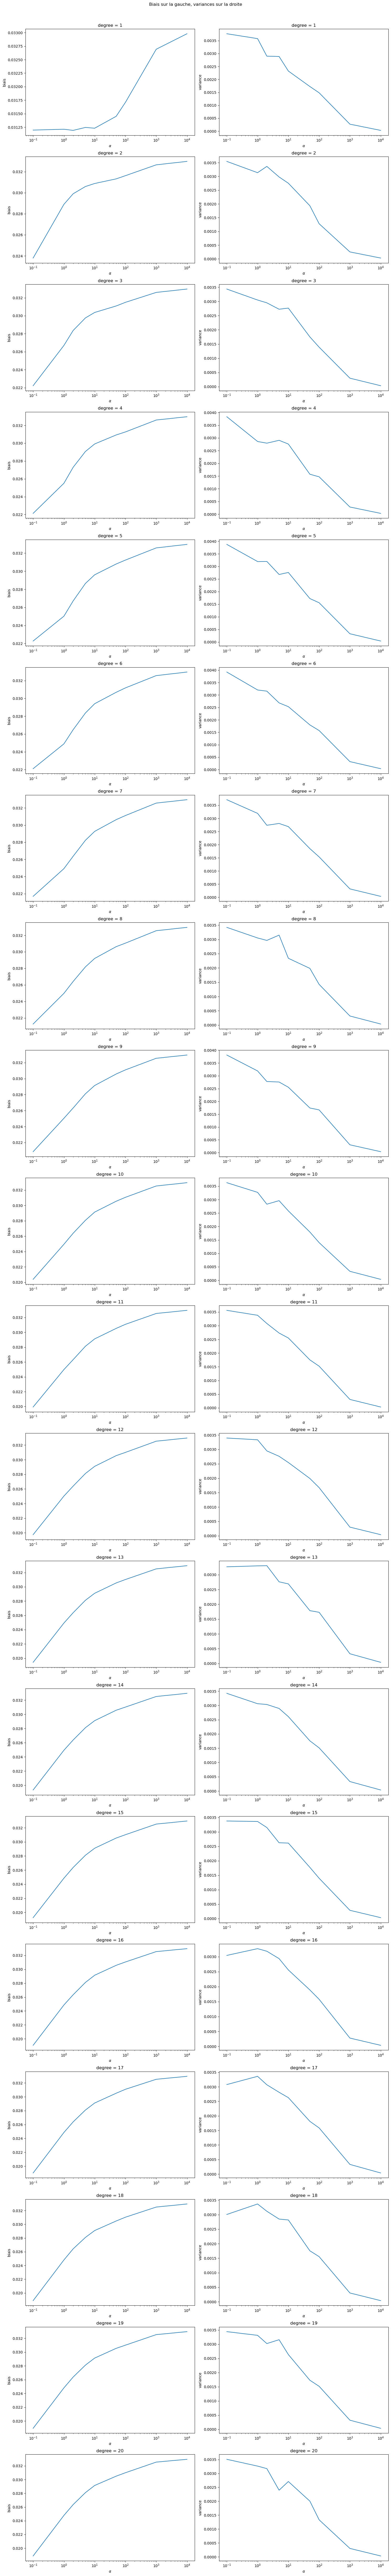

In [9]:
from tqdm.notebook import tqdm

degree_max = 20

alphas_to_test = [0.1, 1, 2, 5, 10, 50, 100, 1000, 10000]

x_to_plot = []
y_to_plot = []

fig, axs = plt.subplots(degree_max, 2, figsize=(15, 100))
for ax in axs.flat:
    ax.set_xlabel('$\\alpha$')
    ax.set_xscale('log') # Échelle logarithmique pour l'axe horizontal

for degree in tqdm(range(1, degree_max + 1)):
    biases = []
    variances = []
    for alpha in alphas_to_test:
        bias, variance = bias_variance(degree, alpha)
        biases.append(bias)
        variances.append(variance)

    axs[degree - 1, 0].plot(alphas_to_test, biases)
    axs[degree - 1, 0].set_ylabel("biais")
    axs[degree - 1, 0].set_title(f"degree = {degree}")
    axs[degree - 1, 1].plot(alphas_to_test, variances)
    axs[degree - 1, 1].set_ylabel("variance")
    axs[degree - 1, 1].set_title(f"degree = {degree}")

fig.suptitle('Biais sur la gauche, variances sur la droite')
fig.tight_layout()
fig.subplots_adjust(top=0.97)
plt.show()

**Bonus (/1,5)** Quand vous affichez les valeurs du vecteur $\theta$ après apprentissage (pour la régression linéaire et pour la *ridge regression* avec `scikit-learn`), observez-vous quelque chose de surprenant sur la valeur du coefficient $\theta_0$ ?

*Réponse :* $\theta_0 = 0$ dans tous les cas ! Cela est dû au fait que `scikit-learn` a déjà alloué le terme de biais (correspondant à la feature $1 = x^0$ et appelé *intercept_term* dans la documentation), et que $\theta_0$ n'est donc pas réellement utilisé. 

En vous basant sur la [documentation de la régression linéaire de `scikit-learn`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), expliquez à quoi cela peut être dû. Modifiez une ligne de votre code plus haut pour éviter cela (ajoutez `# Bonus` en commentaire à côté de la ligne).